In [1]:
import os
import numpy as np
import pandas as pd
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datasets import tsc_dataset_names
import matplotlib.pyplot as plt

In [2]:
dataset_handle = 'NATOPS'
dataset_name = 'natops'
processed_dir = './../../processed/'
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
full_outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
test_key_outp_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
train_outp_fname = os.path.join(output_dir, f'{dataset_name}_train.csv')
test_outp_fname = os.path.join(output_dir, f'{dataset_name}_test.csv')



## Load training data

In [3]:
X_train, y_train = load_UCR_UEA_dataset(name=dataset_handle, split='TRAIN')
X_test, y_test = load_UCR_UEA_dataset(name=dataset_handle, split='TEST')

In [4]:
def prepare_dataset(X, y):
    df = {}
    label_column = []
    for i, row in X.iterrows():
        label = y[i]
        for column in X.columns:
            series_values = row[column].tolist()
            if column in df:
                df[column].extend(series_values)
            else:
                df[column] = series_values
        label_column += [label] * len(series_values)

    df['label'] = label_column
    df = pd.DataFrame(df)
    df.insert(0, 'series_id', 0)
    timestep = list(range(len(df)))
    df.insert(1, 'timestep', timestep)

    return df

            


In [5]:
train_df = prepare_dataset(X_train, y_train)
test_df = prepare_dataset(X_test, y_test)

full = pd.concat([train_df, test_df])


test_key_df = test_df[['series_id', 'timestep', 'label']]
test_df.drop(columns=['label'], inplace=True)

In [6]:
train_df

,series_id,timestep,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21,dim_22,dim_23,label
0,0,0,-0.372758,-1.821679,-0.846321,0.465208,-2.015072,-0.839242,-0.564097,-0.796225,...,0.577993,-1.534954,-0.673190,-0.536343,-1.626957,-0.594337,0.619205,-1.771773,-0.810086,4.0
1,0,1,-0.367844,-1.841987,-0.846325,0.467033,-2.007557,-0.838151,-0.564499,-0.797622,...,0.576627,-1.532795,-0.671919,-0.533816,-1.642514,-0.605328,0.617045,-1.796660,-0.818863,4.0
2,0,2,-0.378445,-1.821358,-0.839571,0.471135,-2.010042,-0.832021,-0.563753,-0.795704,...,0.576456,-1.532478,-0.671555,-0.526319,-1.697145,-0.624302,0.624789,-1.738568,-0.788060,4.0
3,0,3,-0.386751,-1.845643,-0.848031,0.506153,-2.032552,-0.841696,-0.565008,-0.790238,...,0.579362,-1.535441,-0.672198,-0.554538,-1.644413,-0.602884,0.634100,-1.749744,-0.816695,4.0
4,0,4,-0.417101,-1.941721,-0.885500,0.611207,-1.953282,-0.902529,-0.573550,-0.799730,...,0.626759,-1.482552,-0.659393,-0.576196,-1.763092,-0.694843,0.680086,-1.664565,-0.857897,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,0,9175,-0.473294,-1.302773,-1.287290,0.630706,-1.272776,-1.254377,-0.884893,-0.657577,...,0.759877,-1.023339,-0.815714,-0.642529,-1.293713,-1.164139,0.727634,-1.299494,-1.166928,4.0
9176,0,9176,-0.376513,-1.527531,-1.105582,0.465392,-1.509743,-1.149427,-0.849941,-0.687176,...,0.612297,-1.165635,-0.781722,-0.320298,-1.394210,-0.859865,0.600563,-1.477854,-1.052576,4.0
9177,0,9177,-0.398426,-1.604088,-1.019715,0.369039,-1.748786,-1.020002,-0.740238,-0.733597,...,0.453598,-1.538221,-0.713111,-0.238461,-1.400706,-0.803817,0.363055,-1.619070,-0.744291,4.0
9178,0,9178,-0.445217,-1.758361,-0.837733,0.353879,-1.854670,-0.783537,-0.700202,-0.745535,...,0.479162,-1.413416,-0.642361,-0.360042,-1.505406,-0.793616,0.530894,-1.569187,-0.674204,4.0


In [7]:
full.to_csv(full_outp_fname, index=False)
test_key_df.to_csv(test_key_outp_fname, index=False)
train_df.to_csv(train_outp_fname, index=False)
test_df.to_csv(test_outp_fname, index=False)

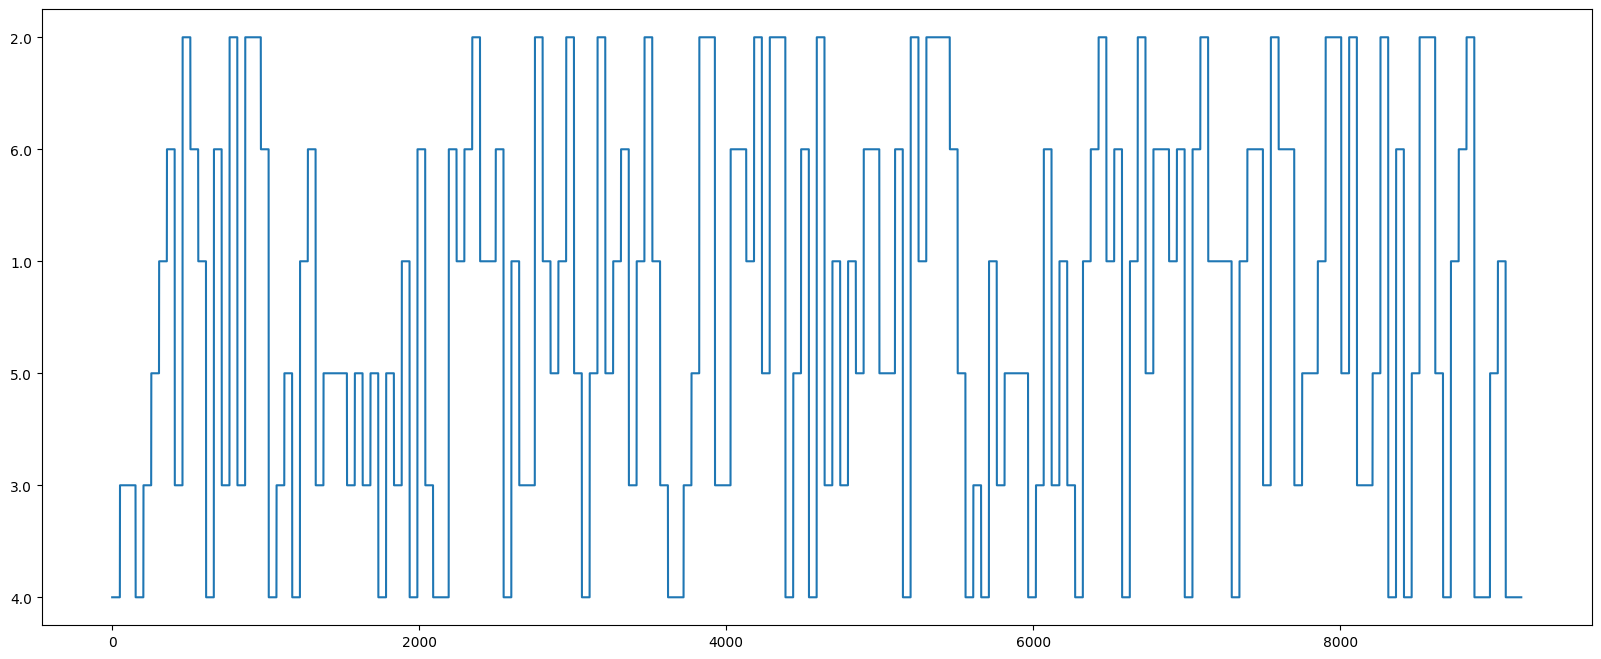

In [8]:
plt.figure(figsize=(20,8))
plt.plot(train_df['label'])